# Compare Kilosort and Phy unit labels

In [54]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_path = 'M:\\analysis\Axel_Bisi\mice_data\AB007\Recording\Ephys\AB007_g0\AB007_g0_imec0\ks25'


#### Load labels

In [36]:
clus_phy = pd.read_csv(os.path.join(data_path,'cluster_group.tsv'), sep='\t')
clus_phy = clus_phy.rename(columns={'group':'label'})
clus_phy['stage'] = 'curated'

In [37]:
clus_phy

,cluster_id,label,stage
0,0,mua,curated
1,1,mua,curated
2,2,mua,curated
3,3,mua,curated
4,4,mua,curated
...,...,...,...
292,341,good,curated
293,342,good,curated
294,343,good,curated
295,346,mua,curated


In [34]:
clus_ks =  pd.read_csv(os.path.join(data_path,'cluster_KSLabel.tsv'), sep='\t')
clus_ks = clus_ks.rename(columns={'KSLabel':'label'})
clus_ks['stage'] = 'kilosort'

In [35]:
clus_ks

,cluster_id,label,stage
0,0,mua,kilosort
1,1,mua,kilosort
2,2,mua,kilosort
3,3,mua,kilosort
4,4,mua,kilosort
...,...,...,...
284,341,mua,kilosort
285,342,mua,kilosort
286,343,mua,kilosort
287,346,mua,kilosort


#### Concat dataframes

In [38]:
clus_merge = pd.concat([clus_phy,clus_ks])
#clus_merge=clus_merge.rename(columns={'group': 'curated', 'KSLabel': 'kilosort'})
clus_merge

,cluster_id,label,stage
0,0,mua,curated
1,1,mua,curated
2,2,mua,curated
3,3,mua,curated
4,4,mua,curated
...,...,...,...
284,341,mua,kilosort
285,342,mua,kilosort
286,343,mua,kilosort
287,346,mua,kilosort


#### Plot number of labels

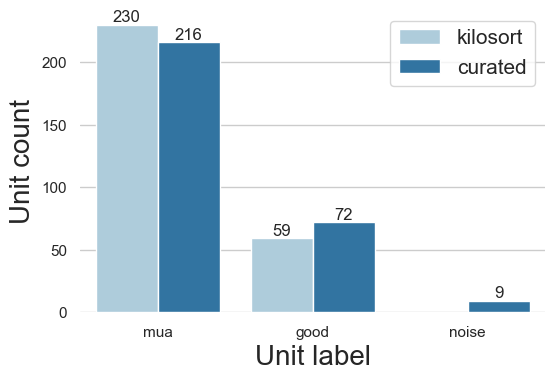

In [66]:
# Draw a nested barplot by species and sex
fig, ax = plt.subplots(1,1, dpi=100)
ax = sns.countplot(x='label', hue='stage', 
                   hue_order=['kilosort','curated'],
                   palette=sns.color_palette("Paired"),
                data=clus_merge, ax=ax)
ax.legend(loc='upper right',frameon=True,title=None, facecolor='w',fontsize=15)
ax.set_ylabel('Unit count', fontsize=20)
ax.set_xlabel('Unit label', fontsize=20)
for container in ax.containers:
    ax.bar_label(container)
sns.despine(left=True, bottom=True)
